# Importing required libraries -

Pandas - This library is used to perform functions on dataframe's read from a CSV File.  
Numpy - An optimised library for application on arrays.  
MatPlotLib - A library that we use to visualise the data.  
SkLearn - A library to perform ML operations.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

# Read The CSV File

In [2]:
raw_dataframe = pd.read_csv("train.csv")

# Analyse the first 5 columns of the Data

In [3]:
raw_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Study column wise data

In [7]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Calculate Column wise error data.

In [8]:
print("Count of NaN data in every column:")
raw_dataframe.isna().sum()

Count of NaN data in every column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Editior Functions for the features.

In [9]:
def initSex(df):
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 2}).astype(int)
    return df

def initEmbarked(df):
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Embarked'] = df['Embarked'].map({'C': 1, 'S': 2,'Q': 3})
    return df

def initAge(df):
    meanAge = df['Age'].mean()
    standardAge = df['Age'].std()
    nanAgeCount = df['Age'].isna().sum()
    upperLimit = meanAge+standardAge
    lowerLimit = meanAge-standardAge
    randomiserList = np.random.randint(lowerLimit,upperLimit,nanAgeCount)
    df.loc[df['Age'].isnull(), 'Age'] = randomiserList
    return df

def initCabin(df):
    df['CabinFlag'] = df['Cabin'].apply(lambda x: 0 if type(x)==float else 1)
    return df

def initFeatures(df):
    df['AgeClass'] = df.loc[:,'Age']*df.loc[:,'Pclass']
    df['SexAge'] = df.loc[:,'Sex']*df.loc[:,'Age']
    return df

def dropCols(df):
    df = df.drop("Name",axis=1)
    df = df.drop("Ticket",axis=1)
    df = df.drop("Cabin",axis=1)
    return df
    
def edit_dataframe(df):
    df = initSex(df)
    df = initEmbarked(df)
    df = initAge(df)
    df = initCabin(df)
    df = initFeatures(df)
    df = dropCols(df)
    return df

# Create the new dataframe after making the edits in the features

In [10]:
new_dataframe = edit_dataframe(raw_dataframe)

# Analyse the new editted data

In [11]:
new_dataframe.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinFlag,AgeClass,SexAge
0,1,0,3,2,22.0,1,0,7.2500,2,0,66.0,44.0
1,2,1,1,1,38.0,1,0,71.2833,1,1,38.0,38.0
2,3,1,3,1,26.0,0,0,7.9250,2,0,78.0,26.0
3,4,1,1,1,35.0,1,0,53.1000,2,1,35.0,35.0
4,5,0,3,2,35.0,0,0,8.0500,2,0,105.0,70.0


# Check the new data for any corrupted data.

In [12]:
print("Count of NaN data in every column:")
new_dataframe.isna().sum()

Count of NaN data in every column:


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinFlag      0
AgeClass       0
SexAge         0
dtype: int64

# Visualising function for a dataframe

In [13]:
def showData(df):
    for i in range(2,len(df.columns)):
        Parameters = df.columns[i]
        plt.hist(x = [df[df['Survived']==1][Parameters], df[df['Survived']==0][Parameters]], label = ['Survived','Dead'])
        plt.title('Survival')
        plt.xlabel(Parameters)
        plt.ylabel('Number of Passengers')
        plt.legend()
        plt.show()

# Visualising the new dataframe

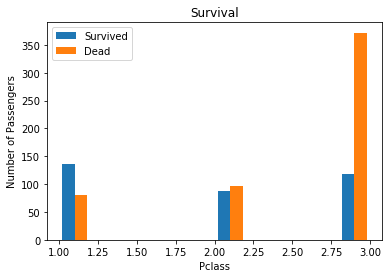

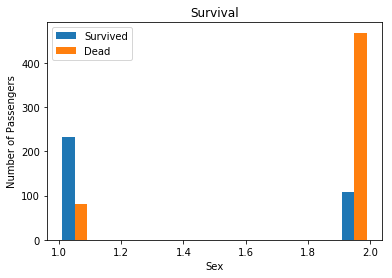

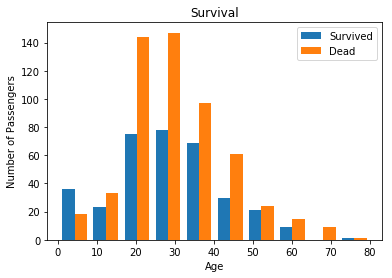

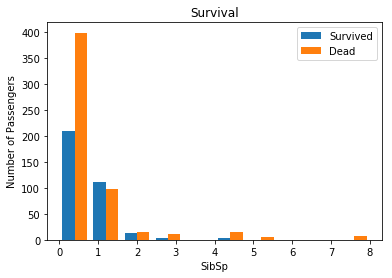

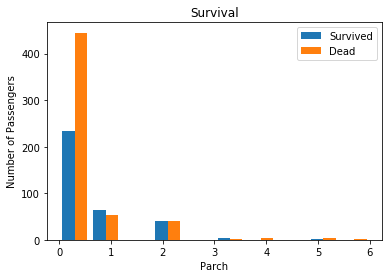

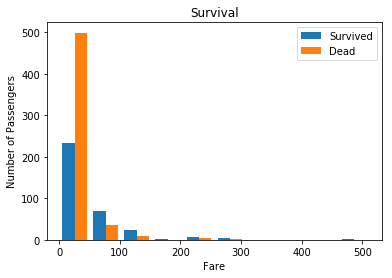

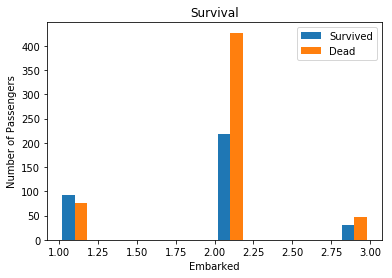

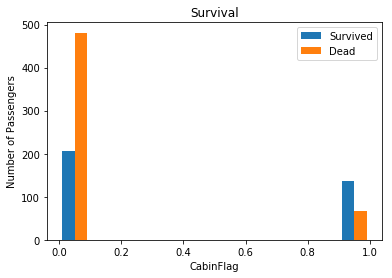

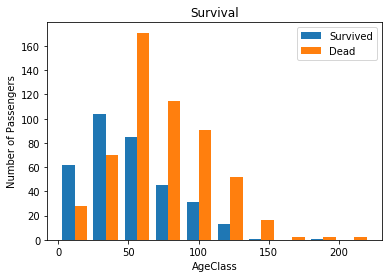

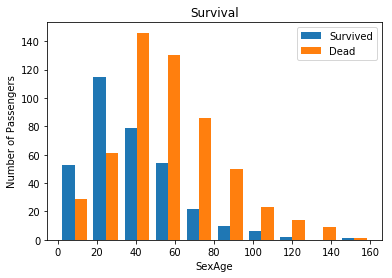

In [14]:
showData(new_dataframe)

# Making a train test split of the data

In [15]:
train_x, test_x, train_y, test_y = train_test_split(
    new_dataframe.loc[:, ('Pclass','Sex','Age','SibSp','Parch','Embarked','CabinFlag','AgeClass','SexAge')], new_dataframe.loc[:, ('Survived')], test_size=0.01, random_state=6)

# Fit the Logistiv Regression Model

In [16]:
logisticRegression = LogisticRegression()
logisticRegression.fit(train_x, train_y)
predictions = logisticRegression.predict(test_x)
accuracyLogistic = accuracy_score(test_y, predictions)
print('Test Accuracy for Logistic Regression: ', accuracyLogistic)

Test Accuracy for Logistic Regression:  0.8888888888888888


/home/ashmeet13/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Create the submission for Kaggle

In [19]:
makeSubmission(pd.read_csv("test.csv"),logisticRegression)

CSV Created
